In [1]:
from workshop_utils import * 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Editors in Tacloban
The following query gets basic editing stats for all objects edited in Tacloban, Philippines, grouped by user

```sql
SELECT changesets.user,
       count(distinct(southeastern_asia.id)) AS objects,
       count(southeastern_asia.id) AS edits,
       count(distinct(southeastern_asia.changeset)) AS changesets,
       min(southeastern_asia.updated) AS first_edit,
       max(southeastern_asia.updated) AS last_edit
FROM southeastern_asia
JOIN changesets
    ON southeastern_asia.changeset = changesets.id
WHERE ST_WITHIN( geom , ST_Polygon('POLYGON((124.909271 11.293189, 125.088518 11.293189, 125.088518 10.954934, 124.909271 10.954934, 124.909271 11.293189))') )
GROUP BY  changesets.user ORDER BY objects DESC
```

In [2]:
users = load_dataframe_from_s3('https://us-east-2.console.aws.amazon.com/athena/query/results/fb1251c3-8202-4e57-82f5-7dbea0b4f84a/csv')

data/fb1251c3-8202-4e57-82f5-7dbea0b4f84a.csv
Creating dataframe... done.  Found 835 rows

In [3]:
users.head(2)

,user,objects,edits,changesets,first_edit,last_edit
0,Jiří Komárek,19344,24151,141,2013-11-07 19:41:00.000,2013-11-30 22:39:34.000
1,schadow1,13052,15482,100,2013-11-10 10:11:32.000,2018-02-17 09:30:33.000


In [4]:
# Basic dataframe cleaning and maintenance
users['first_edit'] = users.first_edit.apply(pd.Timestamp)
users['last_edit']  = users.last_edit.apply(pd.Timestamp)

In [9]:
users['first_day'] = users.first_edit.apply(pd.Timestamp.date)

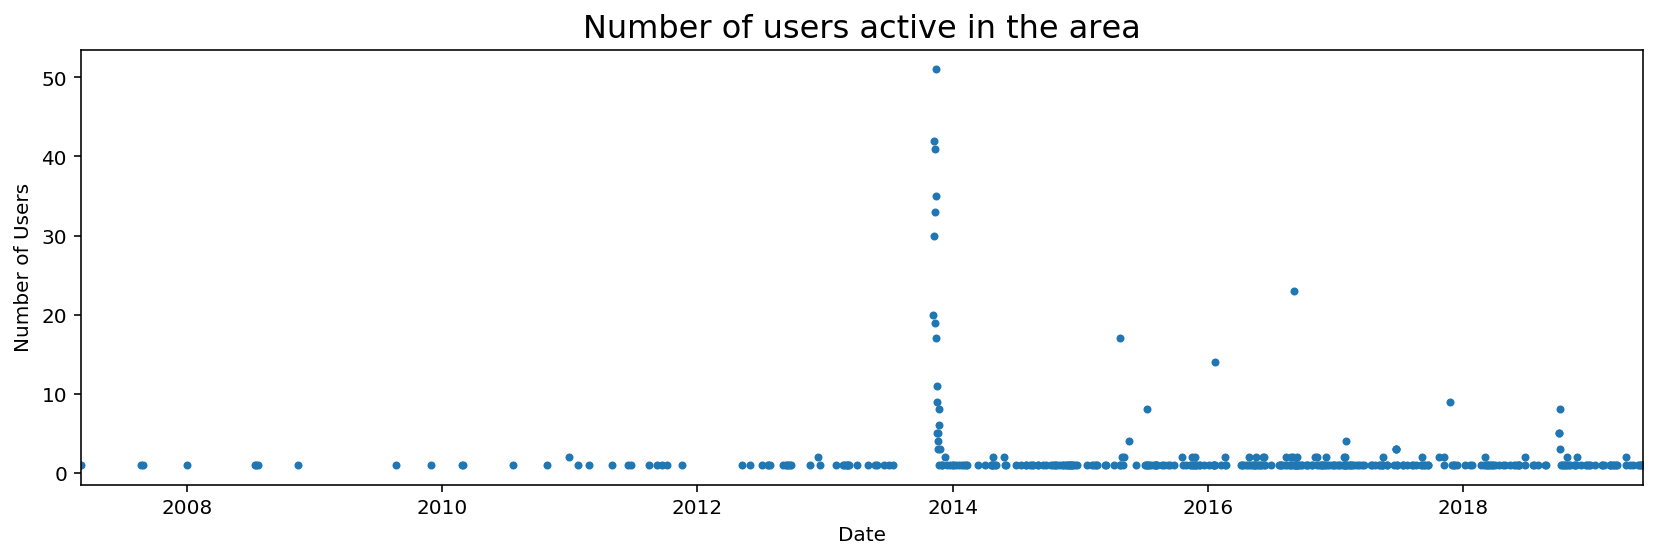

In [16]:
ax = users.groupby('first_day').aggregate({'user':'count'}).plot(style='.', figsize=(14,4),legend=None)
ax.set_title("Number of users active in the area",fontsize=16)
ax.set_xlabel("Date"); ax.set_ylabel("Number of Users");
# ax.set_xlim(datetime.date(2012,1,1)); 

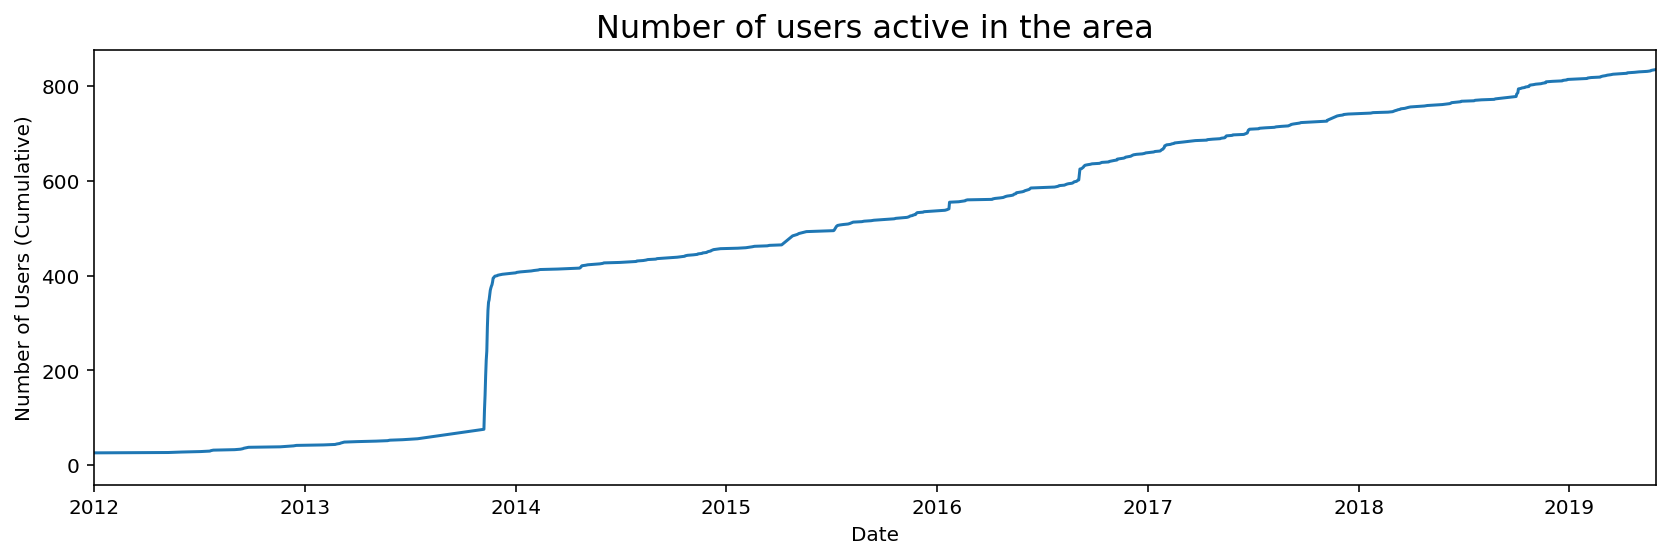

In [11]:
ax = users.groupby('first_day').aggregate({'user':'count'}).cumsum().plot(figsize=(14,4),legend=None)
ax.set_title("Number of users active in the area",fontsize=16)
ax.set_xlabel("Date"); ax.set_ylabel("Number of Users (Cumulative)")
ax.set_xlim(datetime.date(2012,1,1)); 

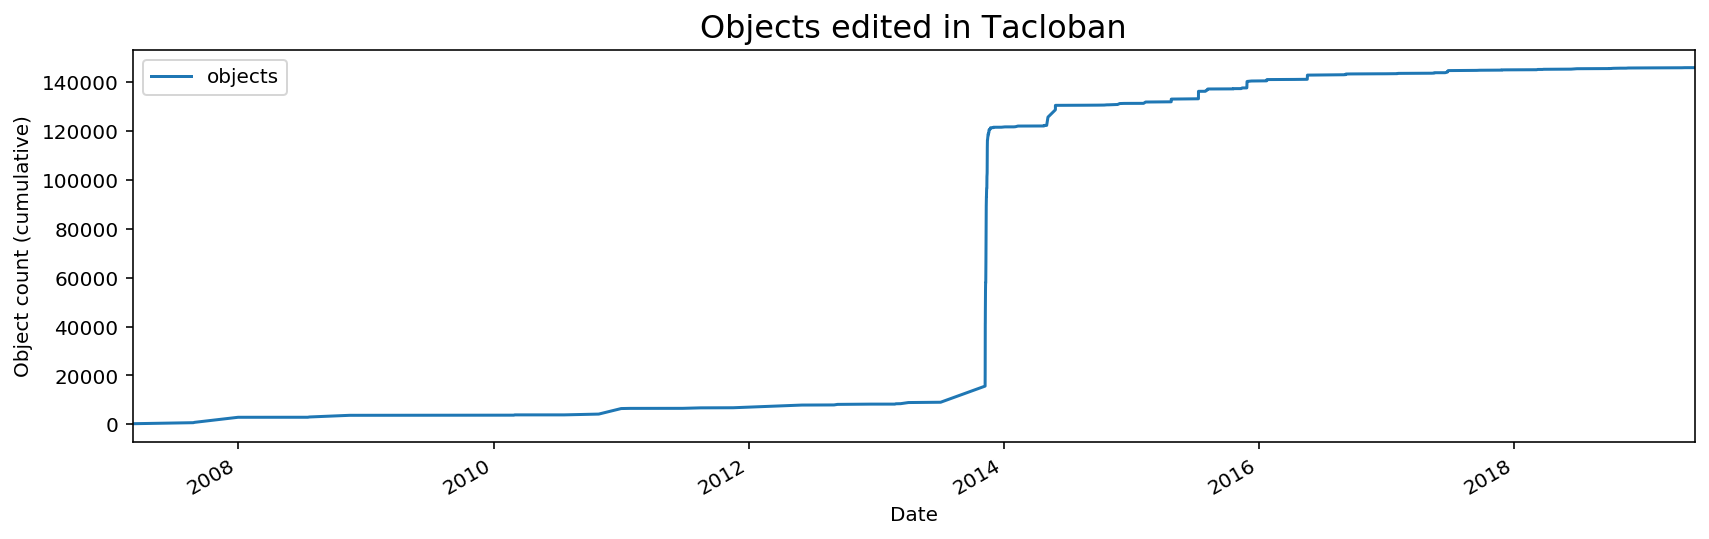

In [6]:
ax = users.groupby('first_edit').aggregate({'objects':'sum'}).cumsum().plot(figsize=(14,4))
ax.set_title("Objects edited in Tacloban",fontsize=16);
ax.set_xlabel("Date"); ax.set_ylabel("Object count (cumulative)");